# Nutrisense

In [1]:
! pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
    --------------------------------------- 0.3/11.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/11.1 MB 578.7 kB/s eta 0:00:19
   - -------------------------------------- 0.5/11.1 MB 578.7 kB/s eta 0:00:19
   - -------------------------------------- 0.5/11.1 MB 578.7 kB/s eta 0:00:19
   - -------------------------------------- 0.5/11.1 MB 578.7 kB/s eta 0:00:19
   -- ------------------------------------- 0.8/11.1 MB 419.4 kB/s eta 0:00:25
   --- ------------------------------------ 1.0/11.1 MB 503.5 kB/s eta 0:00:20
   --- ------------------------------------ 1.0/11.1 MB 503.5 kB/s eta 0:00:20
   ---- -----------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: C:\Python312\python.exe -m pip install --upgrade pip


In [ ]:
import pandas as pd

# Load dataset
file_path = 'recipe_final.csv'
recipe_df = pd.read_csv(file_path)

recipe_df.head()

,Unnamed: 0,recipe_id,recipe_name,aver_rate,image_url,review_nums,calories,fat,carbohydrates,protein,cholesterol,sodium,fiber,ingredients_list
0,0,222388,Homemade Bacon,5.00,https://images.media-allrecipes.com/userphotos...,3,15,36,1,42,21,81,2,"['pork belly', 'smoked paprika', 'kosher salt'..."
1,1,240488,"Pork Loin, Apples, and Sauerkraut",4.76,https://images.media-allrecipes.com/userphotos...,29,19,18,10,73,33,104,41,"['sauerkraut drained', 'Granny Smith apples sl..."
2,2,218939,Foolproof Rosemary Chicken Wings,4.57,https://images.media-allrecipes.com/userphotos...,12,17,36,2,48,24,31,4,"['chicken wings', 'sprigs rosemary', 'head gar..."
3,3,87211,Chicken Pesto Paninis,4.62,https://images.media-allrecipes.com/userphotos...,163,32,45,20,65,20,43,18,"['focaccia bread quartered', 'prepared basil p..."
4,4,245714,Potato Bacon Pizza,4.50,https://images.media-allrecipes.com/userphotos...,2,8,12,5,14,7,8,3,"['red potatoes', 'strips bacon', 'Sauce:', 'he..."


In [23]:
len(recipe_df)

48735

In [24]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline

In [ ]:
# Preprocess bahan
vectorizer = TfidfVectorizer()
X_ingredients = vectorizer.fit_transform(recipe_df['ingredients_list'])

In [ ]:
# Normalisasi data numerik
scaler = StandardScaler()
X_numerical = scaler.fit_transform(recipe_df[['protein', 'carbohydrates', 'fat', 'fiber']])

In [ ]:
# gabungkan fitur
X_combined = np.hstack([X_numerical, X_ingredients.toarray()])

# Train KNN Model testing untuk mencari titik elbow
knn = NearestNeighbors(n_neighbors=20, metric='euclidean')
knn.fit(X_combined)

NearestNeighbors(metric='euclidean', n_neighbors=20)

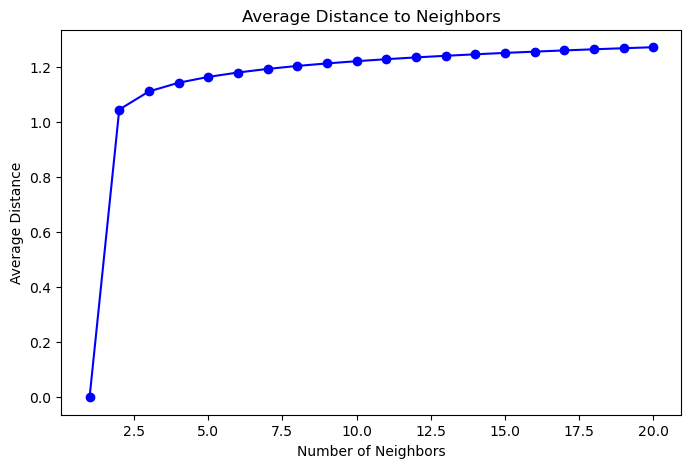

In [ ]:
#testing mencari titik elbow sampai n = 20
distances, _ = knn.kneighbors(X_combined)
avg_distances = np.mean(distances, axis=0)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(avg_distances) + 1), avg_distances, marker='o', color='b')
plt.title("Average Distance to Neighbors")
plt.xlabel("Number of Neighbors")
plt.ylabel("Average Distance")
plt.show()

Didapatkan titik elbow pada n = 3

In [33]:
# Train KNN Model dgn n = 3
knn = NearestNeighbors(n_neighbors=3, metric='euclidean')
knn.fit(X_combined)

NearestNeighbors(metric='euclidean', n_neighbors=3)

In [34]:
# Function to Recommend Recipes
def recommend_recipes(umur, gender, list_bahan):
    if umur < 7:
        print("maaf umur tidak termasuk anak sd")
    #gizi sesuai PERATURAN MENTERI KESEHATAN REPUBLIK INDONESIA
    elif umur < 10:
        input_features = [13.3, 83.3,18.3,7.8,list_bahan] # protein, karbo, lemak, serat
    elif umur < 13:
        if gender == 1: #1 untuk lk dan #0 untuk pr
            input_features = [16.7, 100, 21.7,9.3,list_bahan]
        else:
            input_features = [18.3, 93.3 ,21.7, 9,list_bahan]
    else:
        print("maaf umur tidak termasuk anak sd") #khusus untuk anak sd range 7-12
    input_features_scaled = scaler.transform([input_features[:4]])
    input_ingredients_transformed = vectorizer.transform([input_features[4]])
    input_combined = np.hstack([input_features_scaled, input_ingredients_transformed.toarray()])
    distances, indices = knn.kneighbors(input_combined)
    recommendations = recipe_df.iloc[indices[0]]
    return recommendations[['recipe_name', 'ingredients_list', 'image_url']]

# Example Input
input_features = [10, 1,'chicken']
recommendations = recommend_recipes(10, 1,'chicken')
recommendations

c:\Users\ergik\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


,recipe_name,ingredients_list,image_url
11552,Pulled BBQ Chicken Sliders,"['skinless boneless chicken breast halves', 'o...",https://images.media-allrecipes.com/userphotos...
19591,Churro Log Cabin,"['canned white frosting', ""pre-made churros (s...",http://images.media-allrecipes.com/userphotos/...
24585,Poached Pears Belle Helene,"['water', 'lemon zested and juiced', 'Bosc pea...",http://images.media-allrecipes.com/userphotos/...
